In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline


In [3]:
model = gensim.models.Word2Vec.load(r'C:\Users\trush\OneDrive\Documents\Projects\Python\Word2Vec\SG.w2v')
X = model.wv.__getitem__(model.wv.vocab)

In [4]:
tsne = TSNE(n_components=3, n_iter=1000) # 200 is minimum iter; default is 1000

In [5]:
X_2d = tsne.fit_transform(X)
# create DataFrame for storing results and plotting
coords_df = pd.DataFrame(X_2d, columns=['x','y','z'])
coords_df['token'] = model.wv.vocab.keys()

Loading BokehJS ...

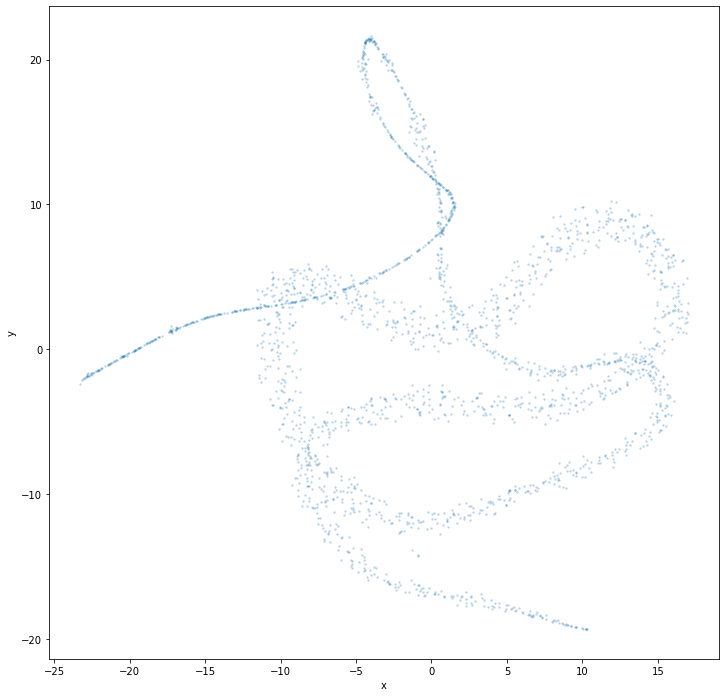

In [6]:
_ = coords_df.plot.scatter('x', 'y', figsize=(12,12), marker='.', s=10, alpha=0.2)
output_notebook() # output bokeh plots inline in notebook

In [7]:
subset_df = coords_df.sample(n=len(X))
p = figure(plot_width=800, plot_height=800)
_ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

In [8]:
show(p)

In [9]:
def jupyter_bokeh(file_loc):
    model = gensim.models.Word2Vec.load(file_loc)
    X = model.wv.__getitem__(model.wv.vocab)
    tsne = TSNE(n_components=3, n_iter=1000)  # 200 is minimum iter; default is 1000
    X_2d = tsne.fit_transform(X)
    
    # create DataFrame for storing results and plotting
    coords_df = pd.DataFrame(X_2d, columns=['x', 'y', 'z'])
    coords_df['token'] = model.wv.vocab.keys()
    
    _ = coords_df.plot.scatter('x', 'y', figsize=(12, 12), marker='.', s=10, alpha=0.2)
    output_notebook()  # output bokeh plots inline in notebook
    subset_df = coords_df.sample(n=len(X))
    
    p = figure(plot_width=800, plot_height=800)
    _ = p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)
    show(p)

Loading BokehJS ...

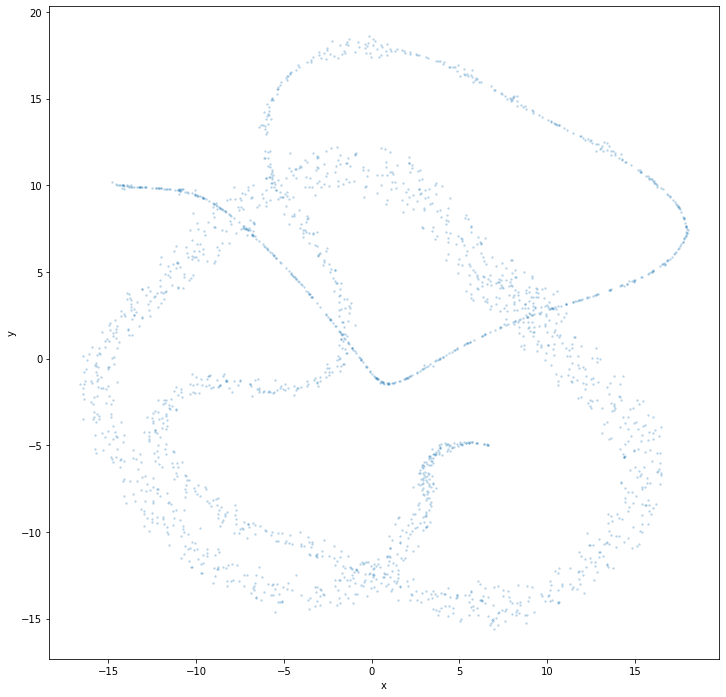

In [10]:
jupyter_bokeh(r"C:\Users\trush\OneDrive\Documents\Projects\Python\Word2Vec\SG.w2v")

Loading BokehJS ...

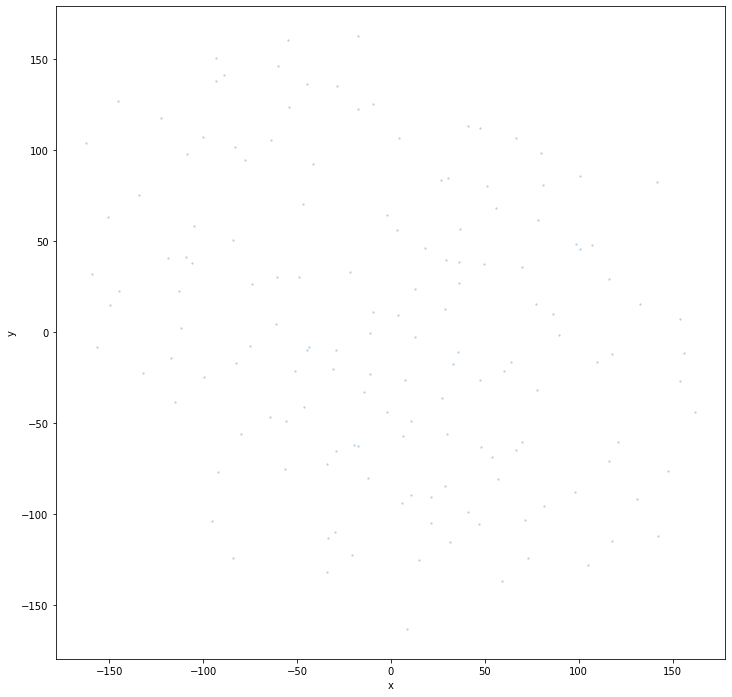

In [11]:
jupyter_bokeh(r"C:\Users\trush\OneDrive\Desktop\pure_gujarati_corpus\yashawant_SG.w2v")

In [12]:

def most_similar(model, word):
    print("Most Similar to " + word + " : \n",model.wv.most_similar(word))

In [13]:
model = gensim.models.Word2Vec.load(r"C:\Users\trush\OneDrive\Desktop\pure_gujarati_corpus\yashawant_SG.w2v")


In [14]:
most_similar(model,'information')

Most Similar to information : 
 [(',', 0.9997222423553467), ('ldrp', 0.9997186064720154), (';', 0.9996910095214844), ('શિફ્ટ=shift', 0.9996881484985352), ('2=૨', 0.9996811151504517), ('8=૮', 0.9996810555458069), ('h.o.d', 0.9996763467788696), ('department', 0.9996742606163025), ('60', 0.999672532081604), ('કમ્પ્યૂટરની', 0.9996709823608398)]


In [15]:
most_similar(model,'હિતેશ')

Most Similar to હિતેશ : 
 [('કમ્પ્યૂટરની', 0.9995378851890564), ('h.o.d', 0.9995304942131042), ('બીજી', 0.9995156526565552), ('ldrp', 0.9995144009590149), ('સમય=time', 0.9995067119598389), ('શિફ્ટ=shift', 0.9995058178901672), (',', 0.9995009899139404), ('60', 0.9995009899139404), ('ડિપાર્ટમેન્ટના', 0.9994999766349792), ('હેડ=hod', 0.9994985461235046)]


In [16]:
most_similar(model,'hod')

Most Similar to hod : 
 [(',', 0.9998050928115845), ('કમ્પ્યૂટરની', 0.999778151512146), ('ldrp', 0.9997742176055908), ('2=૨', 0.9997719526290894), ('શિફ્ટ=shift', 0.9997684359550476), (';', 0.9997661113739014), ('ફેકલ્ટી=faculty', 0.9997661113739014), ('8=૮', 0.9997496604919434), ('અભ્યાસક્રમ=subject', 0.9997467398643494), ('પાલી', 0.999743640422821)]


In [18]:
most_similar(model,'હીરેન')

Most Similar to હીરેન : 
 [('ldrp', 0.999535322189331), ('કમ્પ્યૂટરની', 0.9995352029800415), ('ડિપાર્ટમેન્ટના', 0.9995324611663818), (',', 0.999510645866394), ('60', 0.9995099902153015), ('h.o.d', 0.9995089173316956), ('seat', 0.9994974136352539), ('સીટ', 0.9994969964027405), ('સિલેબસ', 0.9994966983795166), ('સમય=time', 0.9994933605194092)]
